# Machine Learning - Classification
## Heart Disease Prediction

The following notebook shows the process of building a classification model to predict if a person is in risk of a Heart Disease given some features about his healthiness.


In [1]:
# Import libraries

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

In [2]:
# Read source file
#https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

df = pd.read_csv("https://raw.githubusercontent.com/maxhormazabal/heart-disease/master/heart.csv")
nrows,ncol = df.shape

# Train set
x_pretrain = df.iloc[:,:ncol-1]
y_train = df['target']

# Create and fit selector
selector = SelectKBest(chi2, k=4)
selector.fit(x_pretrain, y_train)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
x_train = x_pretrain.iloc[:,cols]

# Split data
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
x_pretrain.iloc[:,cols].columns

Index(['cp', 'thalach', 'oldpeak', 'ca'], dtype='object')

In [ ]:
def visualize_fit(model,x_test, y_test,history):
    history_dict = history.history
    history_dict.keys()

    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(loss_values) + 1)

    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, 'b-o', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r-o', label='Validation loss')

    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']

    plt.plot(epochs, acc, 'b-o', label='Training acc')
    plt.plot(epochs, val_acc, 'r-o', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    results = model.evaluate(x_test, y_test)
    print(results)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

Model: "heart-disease"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               640       
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


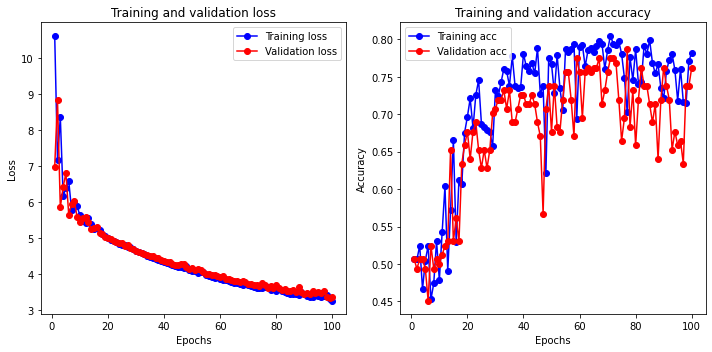

7/7 [==============================] - 0s 2ms/step - loss: 3.2602 - accuracy: 0.7951
[3.260157823562622, 0.795121967792511]


In [ ]:
model = Sequential(name = 'heart-disease')

initialization = tf.keras.initializers.HeNormal()
regularization = tf.keras.regularizers.l1_l2(0.001)

model.add(Dense(128,activation='relu', name = 'dense_1', kernel_initializer = initialization, kernel_regularizer = regularization, input_shape=[x_train.shape[1]]))
model.add(Dense(64,activation='relu', kernel_initializer = initialization, kernel_regularizer = regularization, name = 'dense_2'))
model.add(Dense(1,activation='sigmoid', name = 'output_layer'))

model.compile(optimizer='adam', loss= tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()

early_stopping = EarlyStopping(monitor='val_loss', mode="auto", patience=7)

history = model.fit(X_train,
                    y_train,
                    epochs = 100,
                    batch_size = 512,
                    validation_split = 0.2,
                    verbose = 0,
                    callbacks=[early_stopping])

visualize_fit(model,X_test,y_test,history)

In [ ]:
def runModel(x_train, y_train, x_test, y_test):
  model = Sequential(name = 'heart-disease')

  initialization = tf.keras.initializers.HeNormal()
  regularization = tf.keras.regularizers.l1_l2(0.001)

  model.add(Dense(128,activation='relu', name = 'dense_1', kernel_initializer = initialization, kernel_regularizer = regularization, input_shape=[x_train.shape[1]]))
  model.add(Dense(64,activation='relu', kernel_initializer = initialization, kernel_regularizer = regularization, name = 'dense_2'))
  model.add(Dense(1,activation='sigmoid', name = 'output_layer'))

  model.compile(optimizer='adam', loss= tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

  early_stopping = EarlyStopping(monitor='val_loss', mode="auto", patience=7)

  history = model.fit(X_train,
                      y_train,
                      epochs = 100,
                      batch_size = 512,
                      validation_split = 0.2,
                      verbose = 0,
                      callbacks=[early_stopping])
  loss_value,accuracy_value = model.evaluate(x_test, y_test,verbose=0)
  return model, accuracy_value

In [ ]:
iterations = 20
accuracy_values = []
models = []

for i in range(iterations):
  print("--- Execution",i,"----\n")
  model, accuracy_value = runModel(X_train, y_train, X_test, y_test)
  models.append(model)
  accuracy_values.append(accuracy_value)

max_accuracy = max(accuracy_values)
max_index = accuracy_values.index(max_accuracy)

print(max_accuracy)

final_model = models[max_index]

--- Execution 0 ----

--- Execution 1 ----

--- Execution 2 ----

--- Execution 3 ----

--- Execution 4 ----

--- Execution 5 ----

--- Execution 6 ----

--- Execution 7 ----

--- Execution 8 ----

--- Execution 9 ----

--- Execution 10 ----

--- Execution 11 ----

--- Execution 12 ----

--- Execution 13 ----

--- Execution 14 ----

--- Execution 15 ----

--- Execution 16 ----

--- Execution 17 ----

--- Execution 18 ----

--- Execution 19 ----

0.8536585569381714


In [ ]:
prediction = model.predict([[0,168,0,1.0]])
prediction

1/1 [==============================] - 0s 110ms/step


array([[0.09354257]], dtype=float32)

In [ ]:
# Save model
model.save('heartdisease.h5')

In [ ]:
!mkdir -p output

In [ ]:
!pip install tensorflowjs

In [ ]:
!tensorflowjs_converter --input_format keras heartdisease.h5 output

2023-02-08 15:41:24.906868: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-08 15:41:24.910785: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-08 15:41:24.910833: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
